<a href="https://colab.research.google.com/github/farhan1503001/Synthetic-Aperture-Radar-Data-Analysis/blob/main/Pearson_Correlation_Coefficient_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

# NTL vs DPDC Power Consumption

In [ ]:
file=open('/content/lulc-ntl-1x1-grid.json')
ntl_json=json.load(file)
#print(ntl_json)
NTL_list=[]
for i in range(400):
  cell_id=ntl_json['features'][i]['properties']['cell_id']
  ntl_mean=ntl_json['features'][i]['properties']['NTL_mean_2020']
  #print(cell_id,ntl_mean)
  NTL_list.append(ntl_mean)

In [ ]:
print(NTL_list)

[4.944765567779541, 3.015080451965332, 3.4000580310821533, 2.3542845249176025, 2.3398706912994385, 2.1256814002990723, 2.0220437049865723, 2.568247079849243, 1.3651962280273438, 2.0441904067993164, 1.4399707317352295, 2.15297269821167, 1.039659023284912, 1.8836411237716675, 0.7318394780158997, 1.6941232681274414, 1.268866777420044, 1.7801823616027832, 2.830108642578125, 2.877263069152832, 6.248562335968018, 7.617527484893799, 3.4826908111572266, 8.188878059387207, 2.214195728302002, 4.146238803863525, 2.0923681259155273, 3.2398264408111572, 2.0230135917663574, 3.272946357727051, 1.9047759771347046, 2.776874303817749, 2.2672386169433594, 3.2424886226654053, 2.2596631050109863, 3.0383176803588867, 1.5478230714797974, 1.819012999534607, 1.1507340669631958, 1.3698210716247559, 2.6106956005096436, 2.6693973541259766, 3.1458566188812256, 4.0473408699035645, 4.4911651611328125, 7.194701671600342, 9.537531852722168, 8.91701602935791, 13.576485633850098, 10.270153045654297, 5.804079055786133, 3

In [ ]:
#DPDC
filedpdc=open('/content/lulc-dpdc-1x1-grid.json')
dpdc_json=json.load(filedpdc)
#print(ntl_json)
dpdc_list=[]
for i in range(400):
  cell_id=dpdc_json['features'][i]['properties']['cell_id']
  dpdc_mean=dpdc_json['features'][i]['properties']['2018_KWH']
  print(cell_id,dpdc_mean)
  dpdc_list.append(dpdc_mean)

0 None
1 None
2 None
3 None
4 None
5 None
6 None
7 None
8 None
9 None
10 None
11 None
12 None
13 None
14 None
15 None
16 None
17 None
18 None
19 None
20 None
21 None
22 None
23 None
24 None
25 None
26 None
27 3835.530303030303
28 None
29 2582.041095890411
30 None
31 None
32 None
33 None
34 None
35 None
36 None
37 None
38 None
39 None
40 None
41 None
42 None
43 None
44 2055.7848463187993
45 2103.9783523752253
46 3762.6665960601567
47 5309.026268115942
48 None
49 None
50 None
51 None
52 None
53 None
54 None
55 None
56 None
57 None
58 None
59 None
60 None
61 None
62 2979.2571428571428
63 3124.858093126386
64 2588.7938733125648
65 2902.7860506180104
66 3136.99571706684
67 3415.4278500466544
68 3731.500630517024
69 None
70 None
71 None
72 None
73 None
74 None
75 None
76 None
77 None
78 None
79 None
80 None
81 None
82 None
83 None
84 None
85 None
86 None
87 None
88 None
89 None
90 None
91 3868.764331210191
92 3350.954313561258
93 1726.3917568692757
94 3381.03337439146
95 3402.6582980789235
9

In [ ]:
ntl_final=[]
dpdc_final=[]
for ntl,dpdc in zip(NTL_list,dpdc_list):
  if ntl!=None and dpdc!=None:
    ntl_final.append(ntl)
    dpdc_final.append(dpdc)
  else:
    pass

print(len(ntl_final))
print(len(dpdc_final))

130
130


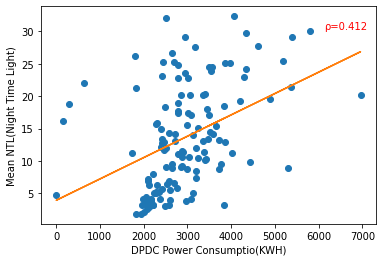

[[1.         0.41156226]
 [0.41156226 1.        ]]


In [ ]:
#Now creating scatter plot with 
x=np.array(dpdc_final)
y=np.array(ntl_final)
import matplotlib.pyplot as plt
corref_matrix=np.corrcoef(x,y)

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel("DPDC Power Consumptio(KWH)")
plt.ylabel("Mean NTL(Night Time Light)")
plt.figtext(0.78,0.8,'ρ=0.412',color='red')
plt.show()
print(corref_matrix)

In [5]:
!pip install rasterio
!pip install shapely
!pip install fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 6.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 281 kB/s 


In [ ]:
#DPDC
filedpdc=open('/content/lulc-dpdc-1x1-grid.json')
dpdc_json=json.load(filedpdc)
#print(ntl_json)
dpdc_cod=[]
for i in range(400):
  cell_id=dpdc_json['features'][0]['properties']['cell_id']
  cod=dpdc_json['features'][0]['geometry']['coordinates'][0]
  print(cell_id,cod)
  print(cod)
  #dpdc_cod.append(cod)

0 [[90.3285015727336, 23.88391489483956], [90.32852041386585, 23.874880723232906], [90.31870686826802, 23.874898779412664], [90.31868754998293, 23.883934286788143], [90.3285015727336, 23.88391489483956]]
[[90.3285015727336, 23.88391489483956], [90.32852041386585, 23.874880723232906], [90.31870686826802, 23.874898779412664], [90.31868754998293, 23.883934286788143], [90.3285015727336, 23.88391489483956]]
0 [[90.3285015727336, 23.88391489483956], [90.32852041386585, 23.874880723232906], [90.31870686826802, 23.874898779412664], [90.31868754998293, 23.883934286788143], [90.3285015727336, 23.88391489483956]]
[[90.3285015727336, 23.88391489483956], [90.32852041386585, 23.874880723232906], [90.31870686826802, 23.874898779412664], [90.31868754998293, 23.883934286788143], [90.3285015727336, 23.88391489483956]]
0 [[90.3285015727336, 23.88391489483956], [90.32852041386585, 23.874880723232906], [90.31870686826802, 23.874898779412664], [90.31868754998293, 23.883934286788143], [90.3285015727336, 23.8

In [ ]:
cell_id=dpdc_json['features'][356]['properties']['cell_id']
cod=dpdc_json['features'][356]['geometry']['coordinates'][0]
print(cod)

[[90.48591897251754, 23.729958774159417], [90.48590417382482, 23.738989057049405], [90.49570964159211, 23.738963872755484], [90.49572481177206, 23.729929589860486], [90.48591897251754, 23.729958774159417]]


In [6]:
import rasterio
from shapely.geometry.polygon import Polygon
from rasterio.mask import mask
from rasterio.plot import reshape_as_image
from PIL import Image

In [ ]:
coords = cod
copenhagen_poly = Polygon(coords)

img_1 = rasterio.open('/content/drive/MyDrive/GRID/Roadkmz.tif')
cropped_img_1, out_transform = mask(img_1, shapes=[copenhagen_poly], crop=True)
print(cropped_img_1.shape)
img_1 = reshape_as_image(cropped_img_1)
print(img_1.shape)
img_1 = Image.fromarray(img_1)
img_1.save("Test.png")

(3, 423, 334)
(423, 334, 3)


# LULC vs DPDC Power Consumption

**Building Block**

In [10]:
def find_max_color(im,cl):
    counter=[0,0,0,0,0,0]
    for h in range(im.shape[0]):
        for w in range(im.shape[1]):
            if im[h, w, 0] == cl[0][0] and im[h, w, 1] == cl[0][1] and im[h, w, 2] == cl[0][2]:
                counter[0]+=1
            elif im[h, w, 0] == cl[1][0] and im[h, w, 1] == cl[1][1] and im[h, w, 2] == cl[1][2]:
                counter[1]+=1
            elif im[h, w, 0] == cl[2][0] and im[h, w, 1] == cl[2][1] and im[h, w, 2] == cl[2][2]:
                counter[2]+=1
            elif im[h, w, 0] == cl[3][0] and im[h, w, 1] == cl[3][1] and im[h, w, 2] == cl[3][2]:
                counter[3]+=1
            elif im[h, w, 0] == cl[4][0] and im[h, w, 1] == cl[4][1] and im[h, w, 2] == cl[4][2]:
                counter[4]+=1
            
            elif im[h, w, 0] == cl[5][0] and im[h, w, 1] == cl[5][1] and im[h, w, 2] == cl[5][2]:
                counter[5]+=1
            
    max_index=counter.index(max(counter))
    return max_index

In [11]:
cl_values=[[  0,0,0], #Unrecognized
 [  0,0,255],#Water
 [  0,255,0],#Farmland
 [255,255,0],#Meadow
 [  0,255,255],#Forest
 [255,0,0]#Building
 ]

In [12]:
#DPDC
filedpdc=open('/content/lulc-dpdc-1x1-grid.json')
dpdc_json=json.load(filedpdc)
#print(ntl_json)
dpdc_power=[]
lulc_label=[]
for i in range(400):
  cell_id=dpdc_json['features'][i]['properties']['cell_id']
  dpdc_mean=dpdc_json['features'][i]['properties']['2018_KWH']
  if dpdc_mean is not None:
    cod=dpdc_json['features'][i]['geometry']['coordinates'][0]
    coords = cod
    copenhagen_poly = Polygon(coords)
    try:
      img_1 = rasterio.open('/content/drive/MyDrive/GRID/Roadkmz.tif')
      cropped_img_1, out_transform = mask(img_1, shapes=[copenhagen_poly], crop=True)
      print(cropped_img_1.shape)
      img_1 = reshape_as_image(cropped_img_1)
      print(img_1.shape)
      label=find_max_color(img_1,cl_values)
      dpdc_power.append(dpdc_mean)
      lulc_label.append(label)
    except:
      print("Out of Bounds")
      

(3, 421, 459)
(421, 459, 3)
(3, 424, 459)
(424, 459, 3)
(3, 424, 460)
(424, 460, 3)
(3, 425, 460)
(425, 460, 3)
(3, 421, 460)
(421, 460, 3)
(3, 424, 460)
(424, 460, 3)
(3, 424, 459)
(424, 459, 3)
(3, 421, 459)
(421, 459, 3)
(3, 424, 459)
(424, 459, 3)
(3, 425, 459)
(425, 459, 3)
(3, 421, 459)
(421, 459, 3)
(3, 424, 459)
(424, 459, 3)
(3, 422, 459)
(422, 459, 3)
(3, 421, 459)
(421, 459, 3)
(3, 424, 460)
(424, 460, 3)
(3, 421, 460)
(421, 460, 3)
(3, 425, 460)
(425, 460, 3)
(3, 424, 460)
(424, 460, 3)
(3, 420, 460)
(420, 460, 3)
(3, 424, 459)
(424, 459, 3)
(3, 422, 459)
(422, 459, 3)
(3, 422, 459)
(422, 459, 3)
(3, 422, 460)
(422, 460, 3)
(3, 422, 460)
(422, 460, 3)
(3, 425, 459)
(425, 459, 3)
(3, 421, 460)
(421, 460, 3)
(3, 424, 460)
(424, 460, 3)
(3, 425, 460)
(425, 460, 3)
(3, 421, 460)
(421, 460, 3)
(3, 425, 460)
(425, 460, 3)
(3, 421, 460)
(421, 460, 3)
(3, 422, 460)
(422, 460, 3)
(3, 421, 460)
(421, 460, 3)
(3, 424, 459)
(424, 459, 3)
(3, 421, 459)
(421, 459, 3)
(3, 424, 459)
(424, 

In [13]:
print(dpdc_power)
print(lulc_label)

[3835.530303030303, 2582.041095890411, 2055.7848463187993, 2103.9783523752253, 3762.6665960601567, 5309.026268115942, 2979.2571428571428, 3124.858093126386, 2588.7938733125648, 2902.7860506180104, 3136.99571706684, 3415.4278500466544, 3731.500630517024, 3868.764331210191, 3350.954313561258, 1726.3917568692757, 3381.03337439146, 3402.6582980789235, 3197.5137228489643, 2691.823122719416, 2612.2371869539893, 2383.3907524932006, 2759.332168850073, 2997.184922824547, 2788.533134278842, 3593.6405591727307, 4893.218776130749, 6960.58590143481, 5365.397336293007, 1832.9475806451612, 289.21875, 3194.198641304348, 3246.9857594936707, 2724.275, 4205.934404024768, 5180.031755602452, 2451.1543908588596, 1806.4107753705816, 628.9886363636364, 159.10169491525423, 2793.669934640523, 3024.6089298539623, 2786.6982410611304, 2512.9401443328143, 4061.4445480687027, 4287.439795918367, 3488.0613644154955, 3193.6987866927593, 3725.864157119476, 4022.540757749713, 3652.592897948585, 3551.216440101954, 5382.77

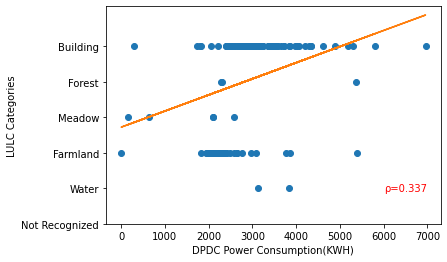

[[1.         0.33705604]
 [0.33705604 1.        ]]


In [14]:
x=np.array(dpdc_power)
y=np.array(lulc_label)
import matplotlib.pyplot as plt
corref_matrix=np.corrcoef(x,y)

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel("DPDC Power Consumption(KWH)")
plt.ylabel("LULC Categories")
plt.yticks(ticks=[0,1,2,3,4,5],labels=["Not Recognized",'Water','Farmland','Meadow','Forest','Building'])
plt.figtext(0.77,0.24,'ρ=0.337',color='red')
plt.show()
print(corref_matrix)

#**Road Classification vs DPDC**

In [ ]:
def find_color_pixels(mask):
    #Using these function we will try to find out the uniques colors in a image
    print("Finding the mask unique pixel values")
    new_shape_mask=np.unique(mask.reshape(-1,mask.shape[2]),axis=0)
    print(new_shape_mask)
    return new_shape_mask
    
def find_max_color(im,cl):
    counter=[0,0,0,0,0,0]
    for h in range(im.shape[0]):
        for w in range(im.shape[1]):
            if im[h, w, 0] == cl[0][0] and im[h, w, 1] == cl[0][1] and im[h, w, 2] == cl[0][2]:
                counter[0]+=1
            elif im[h, w, 0] == cl[1][0] and im[h, w, 1] == cl[1][1] and im[h, w, 2] == cl[1][2]:
                counter[1]+=1
            elif im[h, w, 0] == cl[2][0] and im[h, w, 1] == cl[2][1] and im[h, w, 2] == cl[2][2]:
                counter[2]+=1
            elif im[h, w, 0] == cl[3][0] and im[h, w, 1] == cl[3][1] and im[h, w, 2] == cl[3][2]:
                counter[3]+=1
            """
            elif im[h, w, 0] == cl[4][0] and im[h, w, 1] == cl[4][1] and im[h, w, 2] == cl[4][2]:
                counter[4]+=1
            
            elif im[h, w, 0] == cl[5][0] and im[h, w, 1] == cl[5][1] and im[h, w, 2] == cl[5][2]:
                counter[5]+=1
            """
    max_index=counter.index(max(counter))
    return max_index
#Read the image
filename=r'/content/drive/MyDrive/Corrected Grid and Rule/Road Classification/Grid/Roadrasterrgbwithoutgrid.png'
label=Image.open(filename)
label=label.convert('RGB')
gt=np.array(label)
print("Image size: ",gt.shape)
#Now finding unique pixel values
color_values=find_color_pixels(gt)

Image size:  (8472, 8130, 3)
Finding the mask unique pixel values
[[  0   0   0]
 [ 43 131 186]
 [171 221 164]
 [255 255 191]]


In [ ]:
#DPDC
"""
cl_values=[[  0,0,0],
 [ 43,131,186],
 [171,221,164],
 [255,255,191]]
"""
cl_values=[[  0,0,0],
           [255,255,191],
           [171,221,164],
 [ 43,131,186],
 
 ]
filedpdc=open('/content/lulc-dpdc-1x1-grid.json')
dpdc_json=json.load(filedpdc)
#print(ntl_json)
dpdc_power=[]
lulc_label=[]
for i in range(400):
  cell_id=dpdc_json['features'][i]['properties']['cell_id']
  dpdc_mean=dpdc_json['features'][i]['properties']['2018_KWH']
  if dpdc_mean is not None:
    cod=dpdc_json['features'][i]['geometry']['coordinates'][0]
    coords = cod
    copenhagen_poly = Polygon(coords)

    img_1 = rasterio.open('/content/drive/MyDrive/Corrected Grid and Rule/Road Classification/Grid/Roadraster.tif')
    cropped_img_1, out_transform = mask(img_1, shapes=[copenhagen_poly], crop=True)
    print(cropped_img_1.shape)
    img_1 = reshape_as_image(cropped_img_1)
    #print(img_1.shape)
    img_1 = Image.fromarray(img_1)
    image=img_1.convert('RGB')
    image=np.array(image)
    print(image.shape)
    label=find_max_color(image,cl_values)
    print(label)
    dpdc_power.append(dpdc_mean)
    lulc_label.append(label)
      

(4, 423, 407)
(423, 407, 3)
0
(4, 425, 408)
(425, 408, 3)
0
(4, 426, 407)
(426, 407, 3)
3
(4, 426, 408)
(426, 408, 3)
2
(4, 423, 408)
(423, 408, 3)
0
(4, 426, 408)
(426, 408, 3)
3
(4, 425, 408)
(425, 408, 3)
3
(4, 422, 408)
(422, 408, 3)
3
(4, 426, 407)
(426, 407, 3)
2
(4, 427, 407)
(427, 407, 3)
2
(4, 423, 407)
(423, 407, 3)
2
(4, 426, 408)
(426, 408, 3)
2
(4, 423, 408)
(423, 408, 3)
2
(4, 423, 408)
(423, 408, 3)
3
(4, 426, 407)
(426, 407, 3)
2
(4, 423, 407)
(423, 407, 3)
0
(4, 427, 408)
(427, 408, 3)
3
(4, 425, 408)
(425, 408, 3)
3
(4, 422, 408)
(422, 408, 3)
3
(4, 426, 407)
(426, 407, 3)
3
(4, 424, 407)
(424, 407, 3)
2
(4, 424, 408)
(424, 408, 3)
3
(4, 424, 408)
(424, 408, 3)
2
(4, 423, 408)
(423, 408, 3)
2
(4, 426, 407)
(426, 407, 3)
3
(4, 423, 408)
(423, 408, 3)
2
(4, 425, 408)
(425, 408, 3)
0
(4, 427, 408)
(427, 408, 3)
2
(4, 423, 408)
(423, 408, 3)
2
(4, 426, 408)
(426, 408, 3)
0
(4, 423, 408)
(423, 408, 3)
2
(4, 424, 408)
(424, 408, 3)
3
(4, 424, 408)
(424, 408, 3)
3
(4, 426, 4

In [ ]:
print(lulc_label)
print(dpdc_power)

[0, 0, 3, 2, 0, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 0, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 0, 2, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 0, 0, 2, 3, 3, 1, 2, 2, 1, 3, 3, 2, 3, 2, 1, 2, 1, 0, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 1, 2, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3]
[3835.530303030303, 2582.041095890411, 2055.7848463187993, 2103.9783523752253, 3762.6665960601567, 5309.026268115942, 2979.2571428571428, 3124.858093126386, 2588.7938733125648, 2902.7860506180104, 3136.99571706684, 3415.4278500466544, 3731.500630517024, 3868.764331210191, 3350.954313561258, 1726.3917568692757, 3381.03337439146, 3402.6582980789235, 3197.5137228489643, 2691.823122719416, 2612.2371869539893, 2383.3907524932006, 2759.332168850073, 2997.184922824547, 2788.533134278842, 3593.6405591727307, 4893.218776130749, 6960.58590143481, 5365.397336293007, 1832.9475806451612, 289.21875, 3194.19864130434

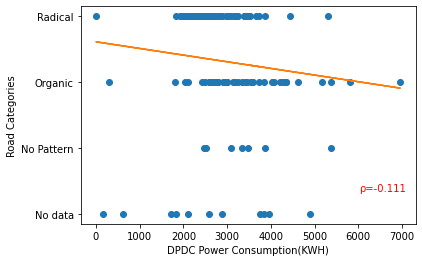

[[ 1.         -0.11128507]
 [-0.11128507  1.        ]]


In [ ]:
x=np.array(dpdc_power)
y=np.array(lulc_label)
import matplotlib.pyplot as plt
corref_matrix=np.corrcoef(x,y)

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel("DPDC Power Consumption(KWH)")
plt.ylabel("Road Categories")
plt.yticks(ticks=[0,1,2,3],labels=["No data",'No Pattern','Organic','Radical'])
plt.figtext(0.77,0.24,'ρ=-0.111',color='red')
plt.show()
print(corref_matrix)

# Building Categorization vs DPDC Power Consumption

In [ ]:
def find_color_pixels(mask):
    #Using these function we will try to find out the uniques colors in a image
    print("Finding the mask unique pixel values")
    new_shape_mask=np.unique(mask.reshape(-1,mask.shape[2]),axis=0)
    print(new_shape_mask)
    return new_shape_mask
    
def find_max_color(im,cl):
    counter=[0,0,0,0,0,0]
    for h in range(im.shape[0]):
        for w in range(im.shape[1]):
            if im[h, w, 0] == cl[0][0] and im[h, w, 1] == cl[0][1] and im[h, w, 2] == cl[0][2]:
                counter[0]+=1
            elif im[h, w, 0] == cl[1][0] and im[h, w, 1] == cl[1][1] and im[h, w, 2] == cl[1][2]:
                counter[1]+=1
            elif im[h, w, 0] == cl[2][0] and im[h, w, 1] == cl[2][1] and im[h, w, 2] == cl[2][2]:
                counter[2]+=1
            elif im[h, w, 0] == cl[3][0] and im[h, w, 1] == cl[3][1] and im[h, w, 2] == cl[3][2]:
                counter[3]+=1
            
            elif im[h, w, 0] == cl[4][0] and im[h, w, 1] == cl[4][1] and im[h, w, 2] == cl[4][2]:
                counter[4]+=1
            """
            elif im[h, w, 0] == cl[5][0] and im[h, w, 1] == cl[5][1] and im[h, w, 2] == cl[5][2]:
                counter[5]+=1
            """
    max_index=counter.index(max(counter))
    return max_index
#Read the image
filename=r'/content/drive/MyDrive/Corrected Grid and Rule/Building classification/Grid/espgbuildingcategorization.png'
label=Image.open(filename)
label=label.convert('RGB')
gt=np.array(label)
print("Image size: ",gt.shape)
#Now finding unique pixel values
color_values=find_color_pixels(gt)
#Black
#Blue
#Cyan
#Red
#Yellow


Image size:  (9033, 9650, 3)
Finding the mask unique pixel values
[[  0   0   0]
 [ 17  35 237]
 [ 21 194 180]
 [253   3   3]
 [255 227  19]]


In [ ]:
cl_values=[[  0,0,0],   #Black
           [253,3,3], #Red
           [255,227,19],#Yellow
           [ 21,194,180], #Cyan
           [ 17,35,237]   #Blue
           ]

filedpdc=open('/content/lulc-dpdc-1x1-grid.json')
dpdc_json=json.load(filedpdc)
#print(ntl_json)
dpdc_power=[]
building_label=[]
for i in range(400):
  cell_id=dpdc_json['features'][i]['properties']['cell_id']
  dpdc_mean=dpdc_json['features'][i]['properties']['2018_KWH']
  if dpdc_mean is not None:
    cod=dpdc_json['features'][i]['geometry']['coordinates'][0]
    coords = cod
    copenhagen_poly = Polygon(coords)

    img_1 = rasterio.open('/content/drive/MyDrive/Corrected Grid and Rule/Building classification/Grid/Building Categorization espg.tif')
    try:
      cropped_img_1, out_transform = mask(img_1, shapes=[copenhagen_poly], crop=True)
      print(cropped_img_1.shape)
      img_1 = reshape_as_image(cropped_img_1)
      #print(img_1.shape)
      img_1 = Image.fromarray(img_1)
      image=img_1.convert('RGB')
      image=np.array(image)
      print(image.shape)
      label=find_max_color(image,cl_values)
      print(label)
      dpdc_power.append(dpdc_mean)
      building_label.append(label)
    except:
      print("Out of bounds")



(4, 440, 480)
(440, 480, 3)
0
(4, 443, 480)
(443, 480, 3)
0
(4, 443, 480)
(443, 480, 3)
0
(4, 443, 480)
(443, 480, 3)
2
(4, 440, 480)
(440, 480, 3)
2
(4, 443, 480)
(443, 480, 3)
0
(4, 443, 480)
(443, 480, 3)
0
(4, 439, 480)
(439, 480, 3)
0
(4, 443, 480)
(443, 480, 3)
0
(4, 443, 480)
(443, 480, 3)
0
(4, 440, 480)
(440, 480, 3)
2
(4, 443, 480)
(443, 480, 3)
3
(4, 440, 480)
(440, 480, 3)
0
(4, 440, 480)
(440, 480, 3)
2
(4, 443, 480)
(443, 480, 3)
3
(4, 439, 480)
(439, 480, 3)
2
(4, 444, 480)
(444, 480, 3)
2
(4, 443, 480)
(443, 480, 3)
2
(4, 439, 480)
(439, 480, 3)
2
(4, 443, 480)
(443, 480, 3)
1
(4, 441, 480)
(441, 480, 3)
1
(4, 441, 479)
(441, 479, 3)
0
(4, 441, 480)
(441, 480, 3)
1
(4, 440, 480)
(440, 480, 3)
1
(4, 443, 480)
(443, 480, 3)
2
(4, 440, 480)
(440, 480, 3)
3
(4, 442, 480)
(442, 480, 3)
3
(4, 445, 480)
(445, 480, 3)
3
(4, 439, 480)
(439, 480, 3)
4
(4, 443, 480)
(443, 480, 3)
3
(4, 440, 481)
(440, 481, 3)
3
(4, 441, 480)
(441, 480, 3)
0
(4, 441, 480)
(441, 480, 3)
1
(4, 443, 4

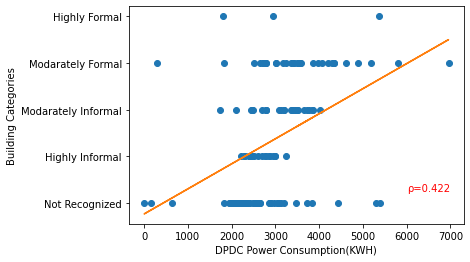

[[1.         0.42192426]
 [0.42192426 1.        ]]


In [ ]:
x=np.array(dpdc_power)
y=np.array(building_label)
import matplotlib.pyplot as plt
corref_matrix=np.corrcoef(x,y)

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.xlabel("DPDC Power Consumption(KWH)")
plt.ylabel("Building Categories")
plt.yticks(ticks=[0,1,2,3,4],labels=["Not Recognized",'Highly Informal','Modarately Informal','Modarately Formal','Highly Formal'])
plt.figtext(0.77,0.24,'ρ=0.422',color='red')
plt.show()
print(corref_matrix)